In [2]:
import pandas as pd
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [3]:
A = pd.read_csv("../assets/data/data_A.csv", header=None)
B = pd.read_csv("../assets/data/data_B.csv", header=None)
C = pd.read_csv("../assets/data/data_C.csv", header=None)
D = pd.read_csv("../assets/data/data_D.csv", header=None)
E = pd.read_csv("../assets/data/data_E.csv", header=None)

In [3]:
idx = np.random.randint(0,A.__len__()-1,1)[0]

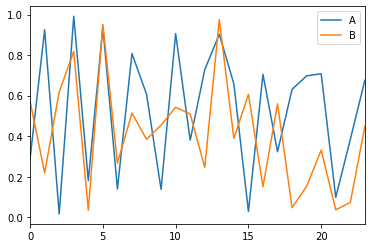

In [4]:
A.iloc[idx,:].plot(label='A')
B.iloc[np.random.randint(0,B.__len__()-1,1)[0],:].plot(label='B')
plt.legend()
plt.show()

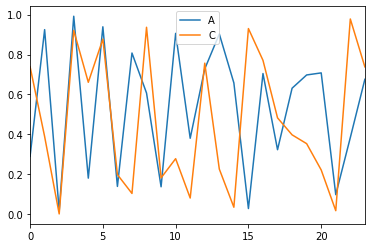

In [5]:
A.iloc[idx,:].plot(label='A')
C.iloc[np.random.randint(0,C.__len__()-1,1)[0],:].plot(label='C')
plt.legend()
plt.show()

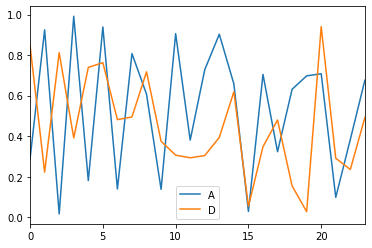

In [6]:
A.iloc[idx,:].plot(label='A')
D.iloc[np.random.randint(0,D.__len__()-1,1)[0],:].plot(label='D')
plt.legend()
plt.show()

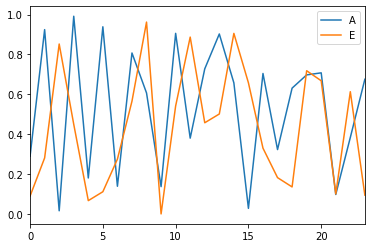

In [7]:
A.iloc[idx,:].plot(label='A')
E.iloc[np.random.randint(0,E.__len__()-1,1)[0],:].plot(label='E')
plt.legend()
plt.show()

From visual inspection, there is very little to differentiate; all tools operate around similar means and spread similarly

<b>Lets try some statistical summaries</b>

In [4]:
def stat_summary(X):
    '''
    Return for each timestamp (hr) return min, max, 0.25 quantile, 0.75 quantile, mean, var
    '''
    return pd.DataFrame(np.array([np.min(X, axis=0), np.quantile(X, axis=0, q=0.25), np.median(X, axis=0), 
          np.quantile(X, axis=0, q=0.75), np.max(X, axis=0), np.mean(X, axis=0), np.var(X, axis=0)]).transpose(), 
                        columns=["Min", "0.25Q", "Med", "0.75Q", "Max", "Mean", "Var"])

<b> Re-run cells several times for confirmation</b>

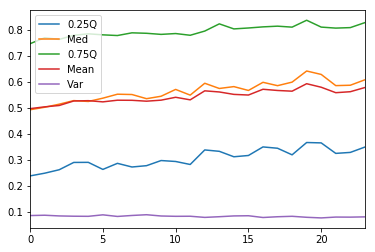

In [69]:
idx_1 = np.random.randint(0, A.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, A.__len__(), 1)[0]
A_stat = stat_summary(A.values[idx_1:idx_2])
A_stat.iloc[:,[1,2,3,5,6]].plot()
plt.show()

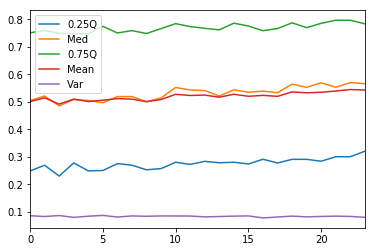

In [99]:
idx_1 = np.random.randint(0, B.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, B.__len__(), 1)[0]
B_stat = stat_summary(B.values[idx_1:idx_2])
B_stat.iloc[:,[1,2,3,5,6]].plot()
plt.show()

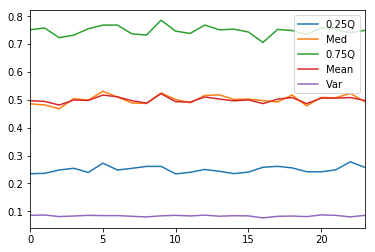

In [120]:
idx_1 = np.random.randint(0, C.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, C.__len__(), 1)[0]
C_stat = stat_summary(C.values[idx_1:idx_2])
C_stat.iloc[:,[1,2,3,5,6]].plot()
plt.show()

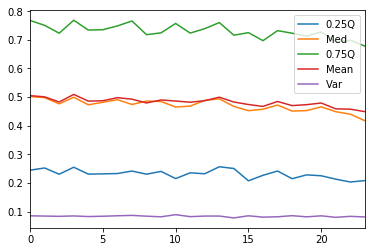

In [135]:
idx_1 = np.random.randint(0, D.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, D.__len__(), 1)[0]
D_stat = stat_summary(D.values[idx_1:idx_2])
D_stat.iloc[:,[1,2,3,5,6]].plot()
plt.show()

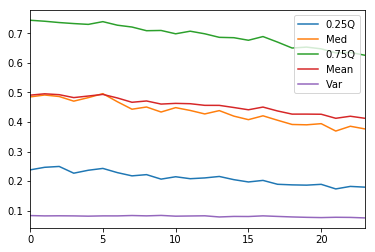

In [144]:
idx_1 = np.random.randint(0, E.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, E.__len__(), 1)[0]
E_stat = stat_summary(E.values[idx_1:idx_2])
E_stat.iloc[:,[1,2,3,5,6]].plot()
plt.show()

<b>So we can see that, on average ( and with control quartiles ) <br/><u>tool A grows,<br/> tool B grows slower,<br/> tool C remains constant,<br/> tool D deteriorates and<br/> tool E deteriorates even faster</u></b>

More specifically, around the later timestamps, the average splits away from the median or that<br/>
1. Tool A is left skewed ( median > mean )
2. Tool B is slightly left skewed
3. Tool C is symmetric
4. Tool D is slightly right skewed
5. Tool E is right skewed ( median < mean )

<b> A simple idea would be to somehow capture the moving averaged trend over timestamps </b>

<b>A skew suggests presence of outliers, that skew the distribution.<br/>Since the skewing occurs at the later part of the signal, there is considerable deviation on these timestamps.<br/>At this point in my analysis, it is unclear to be whether this is a feature of the signal signature ( more likely ) or outlier effect</b>

In [5]:
def trend(X, span = None):
    '''
    Return EWMA trend for signal samples
    '''
    if not span:
        span = X.shape[1]
    return pd.DataFrame(X).apply(lambda x: x.ewm(span=span).mean(), axis=1)

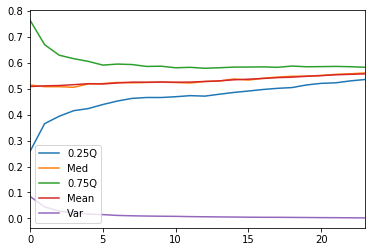

In [200]:
idx_1 = np.random.randint(0, A.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, A.__len__(), 1)[0]
tr = trend(A.values[idx_1:idx_2])
stat_summary(tr).iloc[:,[1,2,3,5,6]].plot()
plt.show()

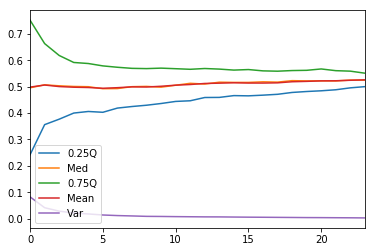

In [202]:
idx_1 = np.random.randint(0, B.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, B.__len__(), 1)[0]
tr = trend(B.values[idx_1:idx_2])
stat_summary(tr).iloc[:,[1,2,3,5,6]].plot()
plt.show()

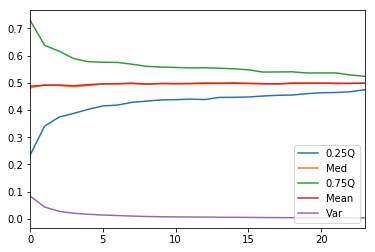

In [205]:
idx_1 = np.random.randint(0, C.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, C.__len__(), 1)[0]
tr = trend(C.values[idx_1:idx_2])
stat_summary(tr).iloc[:,[1,2,3,5,6]].plot()
plt.show()

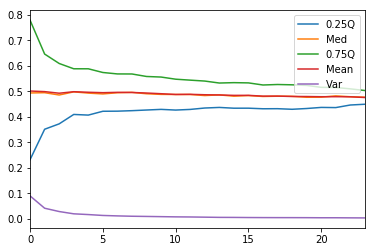

In [210]:
idx_1 = np.random.randint(0, D.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, D.__len__(), 1)[0]
tr = trend(D.values[idx_1:idx_2])
stat_summary(tr).iloc[:,[1,2,3,5,6]].plot()
plt.show()

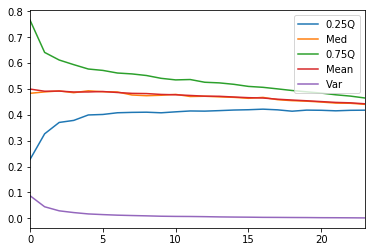

In [211]:
idx_1 = np.random.randint(0, E.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, E.__len__(), 1)[0]
tr = trend(E.values[idx_1:idx_2])
stat_summary(tr).iloc[:,[1,2,3,5,6]].plot()
plt.show()

<b> So at a heavy 24 span EWMA convolution, the mean-shift is clearly visible <br/> Note that since EWMA ignores effects of earlier timestamps, we might have to ignore them once convoluted, as can be seen in the variance </b>

## Detect mean shift over 24 span EWMA convoluted signal

1. First just try to use a MA window

In [6]:
def meanShift(X, window=None):
    '''
    Apply MA on convolved signal and compute rs means
    '''
    # At this point X must be EWMA convolved already
    if not window:
        window = X.shape[1] // 2
    return pd.DataFrame(X).apply(lambda x: x.rolling(window=window).mean(), axis=1).iloc[:,window-1:]

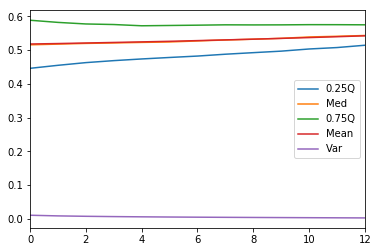

In [229]:
idx_1 = np.random.randint(0, A.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, A.__len__(), 1)[0]
stat_summary(meanShift(trend(A.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

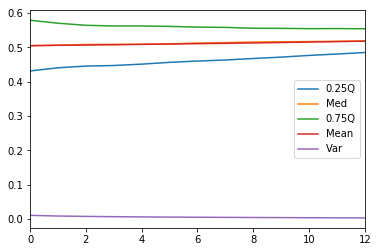

In [230]:
idx_1 = np.random.randint(0, B.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, B.__len__(), 1)[0]
stat_summary(meanShift(trend(B.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

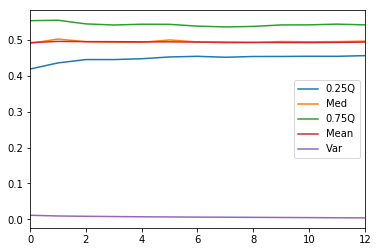

In [232]:
idx_1 = np.random.randint(0, C.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, C.__len__(), 1)[0]
stat_summary(meanShift(trend(C.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

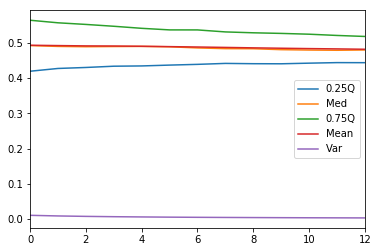

In [233]:
idx_1 = np.random.randint(0, D.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, D.__len__(), 1)[0]
stat_summary(meanShift(trend(D.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

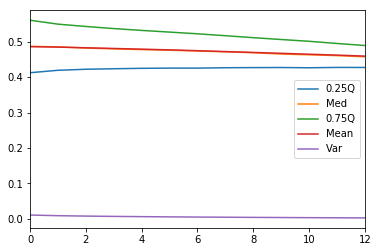

In [234]:
idx_1 = np.random.randint(0, E.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, E.__len__(), 1)[0]
stat_summary(meanShift(trend(E.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

As can be seen, some variance still exist, and the mean shift is minute but detectable ON AVERAGE

2. Now lets try EWMA

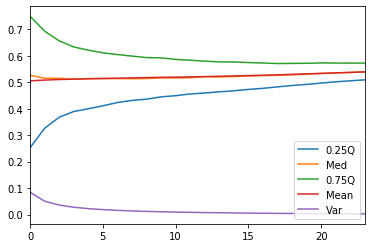

In [7]:
idx_1 = np.random.randint(0, A.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, A.__len__(), 1)[0]
stat_summary(trend(trend(A.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

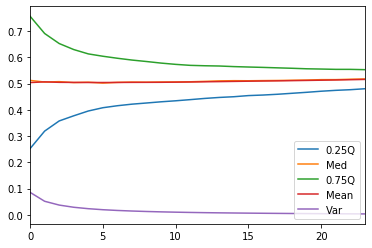

In [8]:
idx_1 = np.random.randint(0, B.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, B.__len__(), 1)[0]
stat_summary(trend(trend(B.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

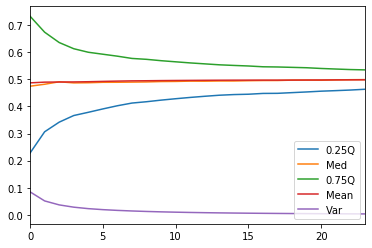

In [10]:
idx_1 = np.random.randint(0, C.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, C.__len__(), 1)[0]
stat_summary(trend(trend(C.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

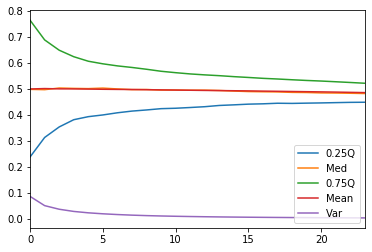

In [11]:
idx_1 = np.random.randint(0, D.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, D.__len__(), 1)[0]
stat_summary(trend(trend(D.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

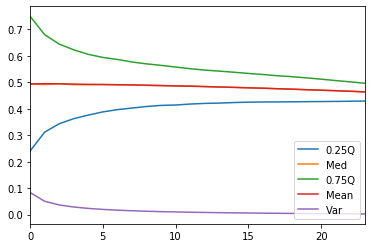

In [12]:
idx_1 = np.random.randint(0, E.__len__() // 2, 1)[0]
idx_2 = np.random.randint(idx_1, E.__len__(), 1)[0]
stat_summary(trend(trend(E.values[idx_1:idx_2]))).iloc[:,[1,2,3,5,6]].plot()
plt.show()

<b><u>Lets compare and extract some more information:</u></b>

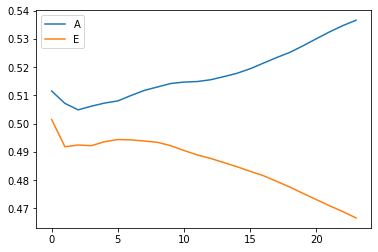

In [18]:
idx_1 = np.random.randint(0, min(A.__len__(), E.__len__()) // 2, 1)[0]
idx_2 = np.random.randint(idx_1, min(A.__len__(), E.__len__()), 1)[0]
plt.plot(stat_summary(trend(trend(A.values[idx_1:idx_2]))).iloc[:,[5]], label='A')
plt.plot(stat_summary(trend(trend(E.values[idx_1:idx_2]))).iloc[:,[5]], label='E')
plt.legend()
plt.show()

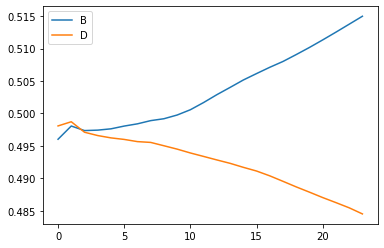

In [29]:
idx_1 = np.random.randint(0, min(B.__len__(), D.__len__()) // 2, 1)[0]
idx_2 = np.random.randint(idx_1, min(B.__len__(), D.__len__()), 1)[0]
plt.plot(stat_summary(trend(trend(B.values[idx_1:idx_2]))).iloc[:,[5]], label='B')
plt.plot(stat_summary(trend(trend(D.values[idx_1:idx_2]))).iloc[:,[5]], label='D')
plt.legend()
plt.show()

<b> 1. Clearly trends for signals from tools A,E and B,D are opposing gradients, so this information should be sufficient to separate them (AB) vs (DE) </b>

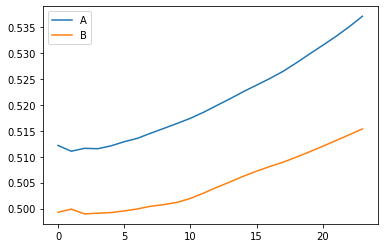

In [17]:
idx_1 = np.random.randint(0, min(A.__len__(), B.__len__()) // 2, 1)[0]
idx_2 = np.random.randint(idx_1, min(A.__len__(), B.__len__()), 1)[0]
plt.plot(stat_summary(trend(trend(A.values[idx_1:idx_2]))).iloc[:,[5]], label='A')
plt.plot(stat_summary(trend(trend(B.values[idx_1:idx_2]))).iloc[:,[5]], label='B')
plt.legend()
plt.show()

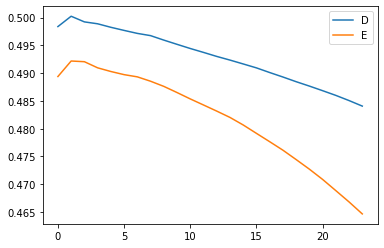

In [27]:
idx_1 = np.random.randint(0, min(D.__len__(), E.__len__()) // 2, 1)[0]
idx_2 = np.random.randint(idx_1, min(D.__len__(), E.__len__()), 1)[0]
plt.plot(stat_summary(trend(trend(D.values[idx_1:idx_2]))).iloc[:,[5]], label='D')
plt.plot(stat_summary(trend(trend(E.values[idx_1:idx_2]))).iloc[:,[5]], label='E')
plt.legend()
plt.show()

<b> 2. However the trends for A vs B and D vs E are similar. So we might need additional information as well to segregate these. </b>

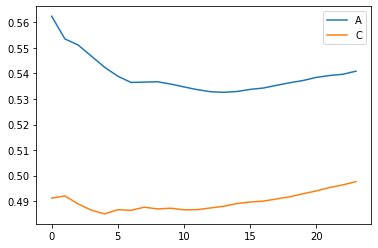

In [51]:
idx_1 = np.random.randint(0, min(A.__len__(), C.__len__()) // 2, 1)[0]
idx_2 = np.random.randint(idx_1, min(A.__len__(), C.__len__()), 1)[0]
plt.plot(stat_summary(trend(trend(A.values[idx_1:idx_2]))).iloc[:,[5]], label='A')
plt.plot(stat_summary(trend(trend(C.values[idx_1:idx_2]))).iloc[:,[5]], label='C')
plt.legend()
plt.show()

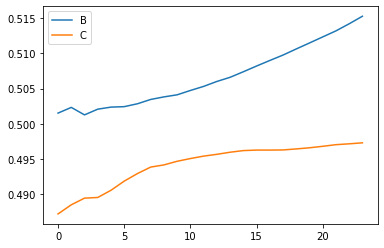

In [181]:
idx_1 = np.random.randint(0, min(B.__len__(), C.__len__()) // 2, 1)[0]
idx_2 = np.random.randint(idx_1, min(B.__len__(), C.__len__()), 1)[0]
plt.plot(stat_summary(trend(trend(B.values[idx_1:idx_2]))).iloc[:,[5]], label='B')
plt.plot(stat_summary(trend(trend(C.values[idx_1:idx_2]))).iloc[:,[5]], label='C')
plt.legend()
plt.show()

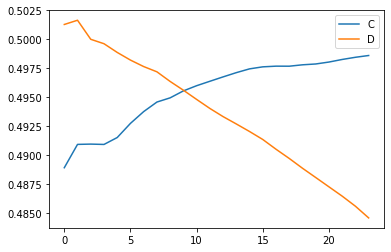

In [58]:
idx_1 = np.random.randint(0, min(C.__len__(), D.__len__()) // 2, 1)[0]
idx_2 = np.random.randint(idx_1, min(C.__len__(), D.__len__()), 1)[0]
plt.plot(stat_summary(trend(trend(C.values[idx_1:idx_2]))).iloc[:,[5]], label='C')
plt.plot(stat_summary(trend(trend(D.values[idx_1:idx_2]))).iloc[:,[5]], label='D')
plt.legend()
plt.show()

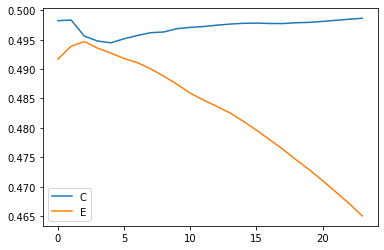

In [60]:
idx_1 = np.random.randint(0, min(C.__len__(), E.__len__()) // 2, 1)[0]
idx_2 = np.random.randint(idx_1, min(C.__len__(), E.__len__()), 1)[0]
plt.plot(stat_summary(trend(trend(C.values[idx_1:idx_2]))).iloc[:,[5]], label='C')
plt.plot(stat_summary(trend(trend(E.values[idx_1:idx_2]))).iloc[:,[5]], label='E')
plt.legend()
plt.show()

<b>3. Finally, it is quite interesting to see that while it might be possible to segregate C vs (DE), it might be much more difficult to segregate (AB) vs C</b>

<b> A naive approach would be to bucket (ABC) vs (DE) </b>

1. Lets take first order EWMA first and check

In [62]:
X = trend(pd.concat([A,B,C,D,E], axis=0))
Y = [0]*(A.__len__() + B.__len__() + C.__len__()) + [1]*(D.__len__() + E.__len__())

In [139]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
def train_test_val_split(X, y, test_size, val_size=0.4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=val_size)
    return X_train, X_test, X_val, y_train, y_test, y_val

In [114]:
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X, Y, test_size=0.2)

In [154]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True), input_shape=(24, 1)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='relu')))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
def reshapeInput(X):
    X_ = []
    for x in X:
        X_.append(x.reshape(-1,1))
    return np.array(X_)

In [129]:
from imblearn.under_sampling import RandomUnderSampler
X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)

In [136]:
model.fit(reshapeInput(X_train.values), tf.keras.utils.to_categorical(y_train), 
          epochs=120, batch_size=100,
          validation_data=(reshapeInput(X_val.values), tf.keras.utils.to_categorical(y_val)),
         callbacks=tf.keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True))

Epoch 1/120
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
125/128 [============================>.] - ETA: 0s - loss: 0.6931 - accuracy: 0.5027WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000203FAC9A8B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

128/128 [==============================] - 1s 12ms/step - loss: 0.3513 - accuracy: 0.8414 - val_loss: 0.3405 - val_accuracy: 0.8514


In [141]:
print(confusion_matrix(y_test,model.predict_classes(reshapeInput(X_test.values))))

[[1080  156]
 [ 166  758]]


In [142]:
print(classification_report(y_test,model.predict_classes(reshapeInput(X_test.values))))

C:\Users\sabri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1236
           1       0.83      0.82      0.82       924

    accuracy                           0.85      2160
   macro avg       0.85      0.85      0.85      2160
weighted avg       0.85      0.85      0.85      2160



model.save("../assets/models/fOT")

2. Now lets take second order EWMA and check

In [148]:
model.fit(reshapeInput(trend(X_train).values), tf.keras.utils.to_categorical(y_train), 
          epochs=120, batch_size=100,
          validation_data=(reshapeInput(trend(X_val).values), tf.keras.utils.to_categorical(y_val)),
         callbacks=tf.keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True))

Epoch 1/120
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
125/128 [============================>.] - ETA: 0s - loss: 0.6933 - accuracy: 0.4956WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000204394DB168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
128/128 [==============================] - 4s 14ms/step - loss: 0.6933 - accuracy: 0.4955 - val_loss: 0.6934 - val_accuracy: 0.4396
Epoch 2/120
128/128 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.4396
Epoch 3/120
128/128 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.4396
Epoch 4/120
128/128 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.4396
Epoch 5/120
128/128 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5067 - val_loss: 0.6927 - va

Does a bad job. Therefore, Second order trend removes useful information

3. Lets try with the original signal information

In [152]:
X = pd.concat([A,B,C,D,E], axis=0)
Y = [0]*(A.__len__() + B.__len__() + C.__len__()) + [1]*(D.__len__() + E.__len__())
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X, Y, test_size=0.2)
X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)

In [155]:
model.fit(reshapeInput(X_train.values), tf.keras.utils.to_categorical(y_train), 
          epochs=120, batch_size=100,
          validation_data=(reshapeInput(X_val.values), tf.keras.utils.to_categorical(y_val)),
         callbacks=tf.keras.callbacks.EarlyStopping(patience=25, restore_best_weights=True))

Epoch 1/120
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
126/127 [============================>.] - ETA: 0s - loss: 0.6676 - accuracy: 0.5694WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002047CC11708> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
127/127 [==============================] - 4s 14ms/step - loss: 0.6667 - accuracy: 0.5710 - val_loss: 0.4799 - val_accuracy: 0.8424
Epoch 2/120
127/127 [==============================] - 1s 11ms/step - loss: 0.4773 - accuracy: 0.8347 - val_loss: 0.4105 - val_accuracy: 0.8375
Epoch 3/120
127/127 [==============================] - 1s 10ms/step - loss: 0.4132 - accuracy: 0.8382 - val_loss: 0.3866 - val_accuracy: 0.8403
Epoch 4/120
127/127 [==============================] - 1s 10ms/step - loss: 0.3962 - accuracy: 0.8399 - val_loss: 0.3817 - val_accuracy: 0.8319
Epoch 5/120
127/127 [==============================] - 1s 10ms/step - loss: 0.3817 - accuracy: 0.8381 - val_loss: 0.3546 - va

In [156]:
print(confusion_matrix(y_test,model.predict_classes(reshapeInput(X_test.values))))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\sabri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[1001  192]
 [ 127  840]]


In [157]:
print(classification_report(y_test,model.predict_classes(reshapeInput(X_test.values))))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1193
           1       0.81      0.87      0.84       967

    accuracy                           0.85      2160
   macro avg       0.85      0.85      0.85      2160
weighted avg       0.85      0.85      0.85      2160



C:\Users\sabri\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


We see that recalls are different for different LSTMs:<br/>
1. The EWMA gives a better recall for ABC whereas the signal info gives better recall for DE. Since ABC are more convoluted, it is key to catch this better and thus the model with first order trend is chosen to bucket the signal